In [222]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../FinalResults'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [223]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], []]


In [224]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [225]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [226]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [227]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,list_index,surprisal_loss
count,1004.000000,1004.0,1.004000e+03,1004.0,1.004000e+03,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,3.720000e+02
mean,50.962151,64.0,1.000000e-05,32.0,2.500000e-04,0.037052,3.952191,0.807079,224.456783,0.829716,232.407454,0.369761,0.002324,4.350598,2.078149e-03
std,31.105240,0.0,1.694910e-21,0.0,1.084743e-19,0.048318,3.082078,0.076053,71.403205,0.088527,123.503927,0.103609,0.001235,2.927606,1.628274e-02
min,0.000000,64.0,1.000000e-05,32.0,2.500000e-04,0.000000,0.000000,0.487480,6.935897,0.487246,6.956998,0.253871,0.000070,0.000000,1.473045e-08
25%,25.000000,64.0,1.000000e-05,32.0,2.500000e-04,0.000000,1.000000,0.808469,199.275211,0.829861,199.112381,0.306057,0.001991,2.000000,4.607893e-05
50%,50.000000,64.0,1.000000e-05,32.0,2.500000e-04,0.000000,4.000000,0.833133,225.159157,0.857906,218.001068,0.336033,0.002180,4.000000,8.912831e-05
75%,75.000000,64.0,1.000000e-05,32.0,2.500000e-04,0.100000,7.000000,0.845578,261.406349,0.874967,263.411942,0.387984,0.002634,7.000000,1.322031e-04
max,124.000000,64.0,1.000000e-05,32.0,2.500000e-04,0.100000,9.000000,0.857772,1349.269775,0.904447,1728.122559,0.696676,0.017281,9.000000,1.780872e-01


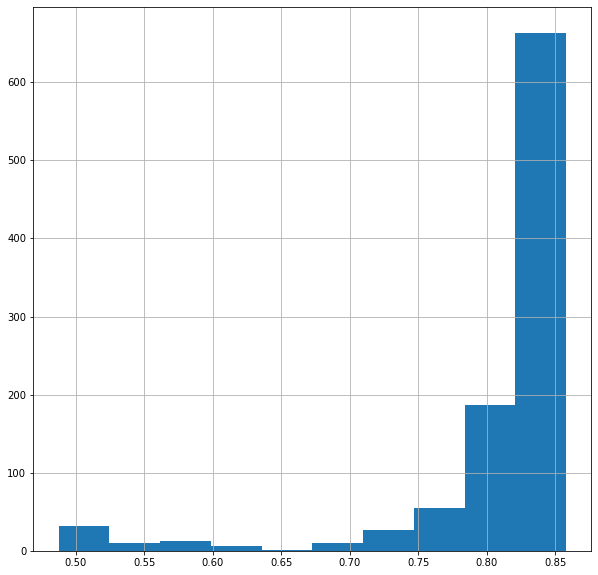

In [228]:
big_df['val_acc'].hist(figsize=(10, 10))

In [229]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [230]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [231]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,list_index,exp,surprisal_loss
0,96,0.00001,0.0,0,0.851663,222.777542,0.884882,216.632874,0.284951,0.002166,0,0,NaN
1,94,0.00001,0.0,5,0.857372,218.716446,0.876469,192.403976,0.298512,0.001924,1,10,NaN
4,88,0.00001,0.0,9,0.855369,233.775040,0.886685,221.660919,0.279359,0.002217,4,18,NaN
6,71,0.00001,0.0,1,0.850761,223.350662,0.879741,211.905975,0.293194,0.002119,6,2,NaN
7,106,0.00001,0.0,2,0.854267,206.390228,0.894231,210.115448,0.271994,0.002101,7,4,NaN
9,81,0.00001,0.0,4,0.857372,232.174683,0.883547,216.794067,0.288798,0.002168,9,8,NaN


In [232]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,list_index,exp,surprisal_loss
2,109,0.00001,0.1,7,0.857772,263.530945,0.892762,263.332001,0.274146,0.002633,2,15,0.000077
3,62,0.00001,0.1,8,0.853065,264.717651,0.872796,263.974213,0.315785,0.002640,3,17,0.000065
5,65,0.00001,0.1,0,0.852163,266.301483,0.871728,267.325317,0.308729,0.002673,5,1,0.000108
8,72,0.00001,0.1,3,0.847155,262.919159,0.875334,263.671661,0.310771,0.002637,8,7,0.000221


In [233]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,list_index,exp,surprisal_loss
3,62,0.00001,0.1,8,0.853065,264.717651,0.872796,263.974213,0.315785,0.002640,3,17,0.000065
5,65,0.00001,0.1,0,0.852163,266.301483,0.871728,267.325317,0.308729,0.002673,5,1,0.000108
6,71,0.00001,0.0,1,0.850761,223.350662,0.879741,211.905975,0.293194,0.002119,6,2,NaN
8,72,0.00001,0.1,3,0.847155,262.919159,0.875334,263.671661,0.310771,0.002637,8,7,0.000221
9,81,0.00001,0.0,4,0.857372,232.174683,0.883547,216.794067,0.288798,0.002168,9,8,NaN
4,88,0.00001,0.0,9,0.855369,233.775040,0.886685,221.660919,0.279359,0.002217,4,18,NaN
1,94,0.00001,0.0,5,0.857372,218.716446,0.876469,192.403976,0.298512,0.001924,1,10,NaN
0,96,0.00001,0.0,0,0.851663,222.777542,0.884882,216.632874,0.284951,0.002166,0,0,NaN
7,106,0.00001,0.0,2,0.854267,206.390228,0.894231,210.115448,0.271994,0.002101,7,4,NaN
2,109,0.00001,0.1,7,0.857772,263.530945,0.892762,263.332001,0.274146,0.002633,2,15,0.000077


In [234]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted.first()

Dataframe with one per trials


epoch  trial   val_acc  val_updates  \
cost_per_sample surprisal_cost                                        
0.00001         0.0                96      0  0.851663   222.777542   
                0.1               109      7  0.857772   263.530945   

                                train_acc  train_updates  entropy_loss  \
cost_per_sample surprisal_cost                                           
0.00001         0.0              0.884882     216.632874      0.284951   
                0.1              0.892762     263.332001      0.274146   

                                budget_loss  list_index exp  surprisal_loss  
cost_per_sample surprisal_cost                                               
0.00001         0.0                0.002166           0   0             NaN  
                0.1                0.002633           2  15        0.000077

In [235]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view = pd.DataFrame({'count': sorted.val_acc.count(),
                     'acc_mean': sorted.val_acc.mean(),
                     'acc_std': sorted.val_acc.std(),
                     'updates_mean': sorted.val_updates.mean(),
                     'updates_std': sorted.val_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.835]

Clearer visualization


count  acc_mean   acc_std  updates_mean  \
cost_per_sample surprisal_cost                                            
0.00001         0.0                 6  0.854467  0.002804     222.86410   
                0.1                 4  0.852539  0.004351     264.36731   

                                updates_std  epoch_mean  
cost_per_sample surprisal_cost                           
0.00001         0.0                9.945565   89.333333  
                0.1                1.490013   77.000000

In [236]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [237]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']] / 2520
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    a = df[['val_acc', 'train_acc']].plot(figsize= (20, 15), ax=ax1, legend=None)
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy")
    # ax1.legend(loc=2)
    lns = ax1.get_lines()
    ax2 = ax1.twinx()
    b = df['val_updates'].plot(ax=ax2, c='r', label="val_updates")
    c = df['train_updates'].plot(ax=ax2, c='g', label="train_updates")
    ax2.set_ylabel("Updates")
    ax2.set_ylim(0, 0.5)
    # lns.append(ax2.get_lines)
    # labs = [l.get_label() for l in lns]
    fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    fig.savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [238]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [239]:
best_hyper = pd.concat(lr0001)

best_hyper_diff = best_hyper['val_acc'].diff(15)
best_hyper_diff.abs().mean()


ValueError: No objects to concatenate

In [ ]:
csvs[11]

best_df.sort_values(by='val_acc')